# 🎉 Welcome to the ' SheCures: AI for Diabetes Prediction – Celebrating International Girls in ICT Day' Hackathon Starter Notebook
This notebook will help you get started on your journey to building an AI model for predicting diabetes types in African women.
**Organized by Dare to be Women Tech** in celebration of *International Girls in ICT Day*.

## 🧩 Problem Statement
Your task is to build a machine learning model that can classify the type of diabetes (e.g., Type 2 or gestational) in women based on health-related features.

In [ ]:
# !pip install -U scikit-learn

In [1]:
# 📦 Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 📂 Load the dataset (update the path as needed)
df = pd.read_csv("data/Train.csv")
df.head()

,Genetic Markers,Family History,Insulin Levels,Blood Glucose Levels,Glucose Tolerance Test,BMI,Waist Circumference,Physical Activity,Dietary Habits,Smoking Status,...,Blood Pressure,Cholesterol Levels,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Ethnicity,Socioeconomic Factors,Target,ID
0,Negative,No,33,147,Abnormal,29,34,Moderate,Healthy,Non-Smoker,...,125,207,Normal,No,Complications,28,Low Risk,Low,Type 2 Diabetes,ID_0000ff
1,Negative,Yes,20,118,Normal,24,35,High,Unhealthy,Non-Smoker,...,121,210,Normal,Yes,Complications,15,High Risk,Medium,Prediabetic,ID_000372
2,Negative,Yes,14,142,Abnormal,22,30,Low,Healthy,Non-Smoker,...,90,167,Normal,Yes,Complications,13,Low Risk,Low,Type 1 Diabetes,ID_0005b8
3,Negative,Yes,38,141,Abnormal,27,34,High,Healthy,Smoker,...,119,219,Normal,No,Normal,25,Low Risk,High,Type 2 Diabetes,ID_000f18
4,Positive,Yes,20,120,Abnormal,24,36,Low,Unhealthy,Smoker,...,120,223,Normal,Yes,Complications,10,Low Risk,Medium,Gestational Diabetes,ID_0011f6


In [3]:
# ℹ️ Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15094 entries, 0 to 15093
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Genetic Markers                15094 non-null  object
 1   Family History                 15094 non-null  object
 2   Insulin Levels                 15094 non-null  int64 
 3   Blood Glucose Levels           15094 non-null  int64 
 4   Glucose Tolerance Test         15094 non-null  object
 5   BMI                            15094 non-null  int64 
 6   Waist Circumference            15094 non-null  int64 
 7   Physical Activity              15094 non-null  object
 8   Dietary Habits                 15094 non-null  object
 9   Smoking Status                 15094 non-null  object
 10  Alcohol Consumption            15094 non-null  object
 11  Blood Pressure                 15094 non-null  int64 
 12  Cholesterol Levels             15094 non-null  int64 
 13  L

In [4]:
df.isnull().sum()

Genetic Markers                  0
Family History                   0
Insulin Levels                   0
Blood Glucose Levels             0
Glucose Tolerance Test           0
BMI                              0
Waist Circumference              0
Physical Activity                0
Dietary Habits                   0
Smoking Status                   0
Alcohol Consumption              0
Blood Pressure                   0
Cholesterol Levels               0
Liver Function Tests             0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Ethnicity                        0
Socioeconomic Factors            0
Target                           0
ID                               0
dtype: int64

In [5]:
# 📊 Basic statistics
df.describe()

,Insulin Levels,Blood Glucose Levels,BMI,Waist Circumference,Blood Pressure,Cholesterol Levels,Weight Gain During Pregnancy
count,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000
mean,20.145952,128.760302,26.078309,35.738174,117.043328,208.352458,20.120578
std,9.633169,25.548681,5.607679,5.041412,12.844156,34.766744,7.616550
min,5.000000,90.000000,15.000000,28.000000,90.000000,150.000000,5.000000
25%,13.000000,110.000000,22.000000,32.000000,109.000000,182.000000,15.000000
50%,18.000000,122.000000,26.000000,35.000000,117.000000,204.000000,20.000000
75%,25.000000,141.000000,30.000000,39.000000,125.000000,230.000000,25.000000
max,49.000000,199.000000,39.000000,49.000000,149.000000,299.000000,39.000000


In [6]:
# 🧮 Class distribution
df['Target'].value_counts()

Target
Type 1 Diabetes         3825
Type 2 Diabetes         3795
Prediabetic             3752
Gestational Diabetes    3722
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

y = df.Target
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)


In [99]:
# Voir toutes les classes dans l'ordre
class_name = le.classes_
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} → {i}")


Gestational Diabetes → 0
Prediabetic → 1
Type 1 Diabetes → 2
Type 2 Diabetes → 3


<Axes: >

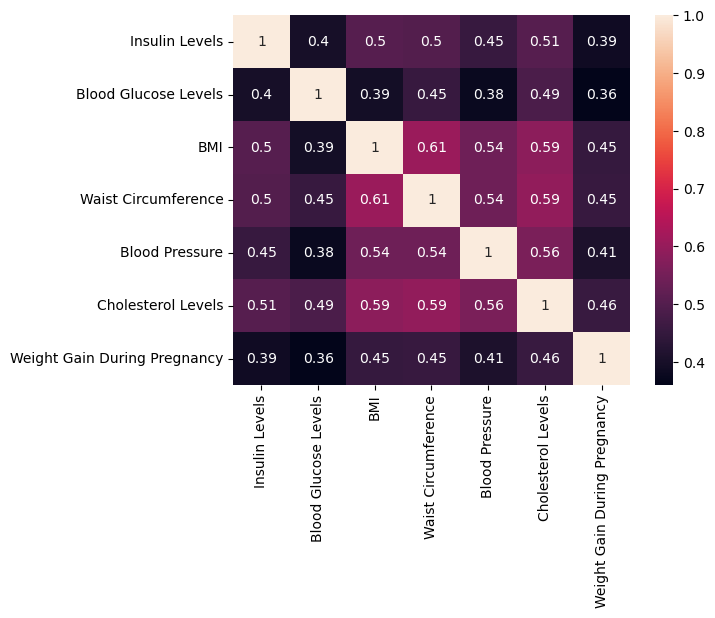

In [47]:
# 🔍 Correlation heatmap
sns.heatmap(df.corr(numeric_only = True),annot = True)

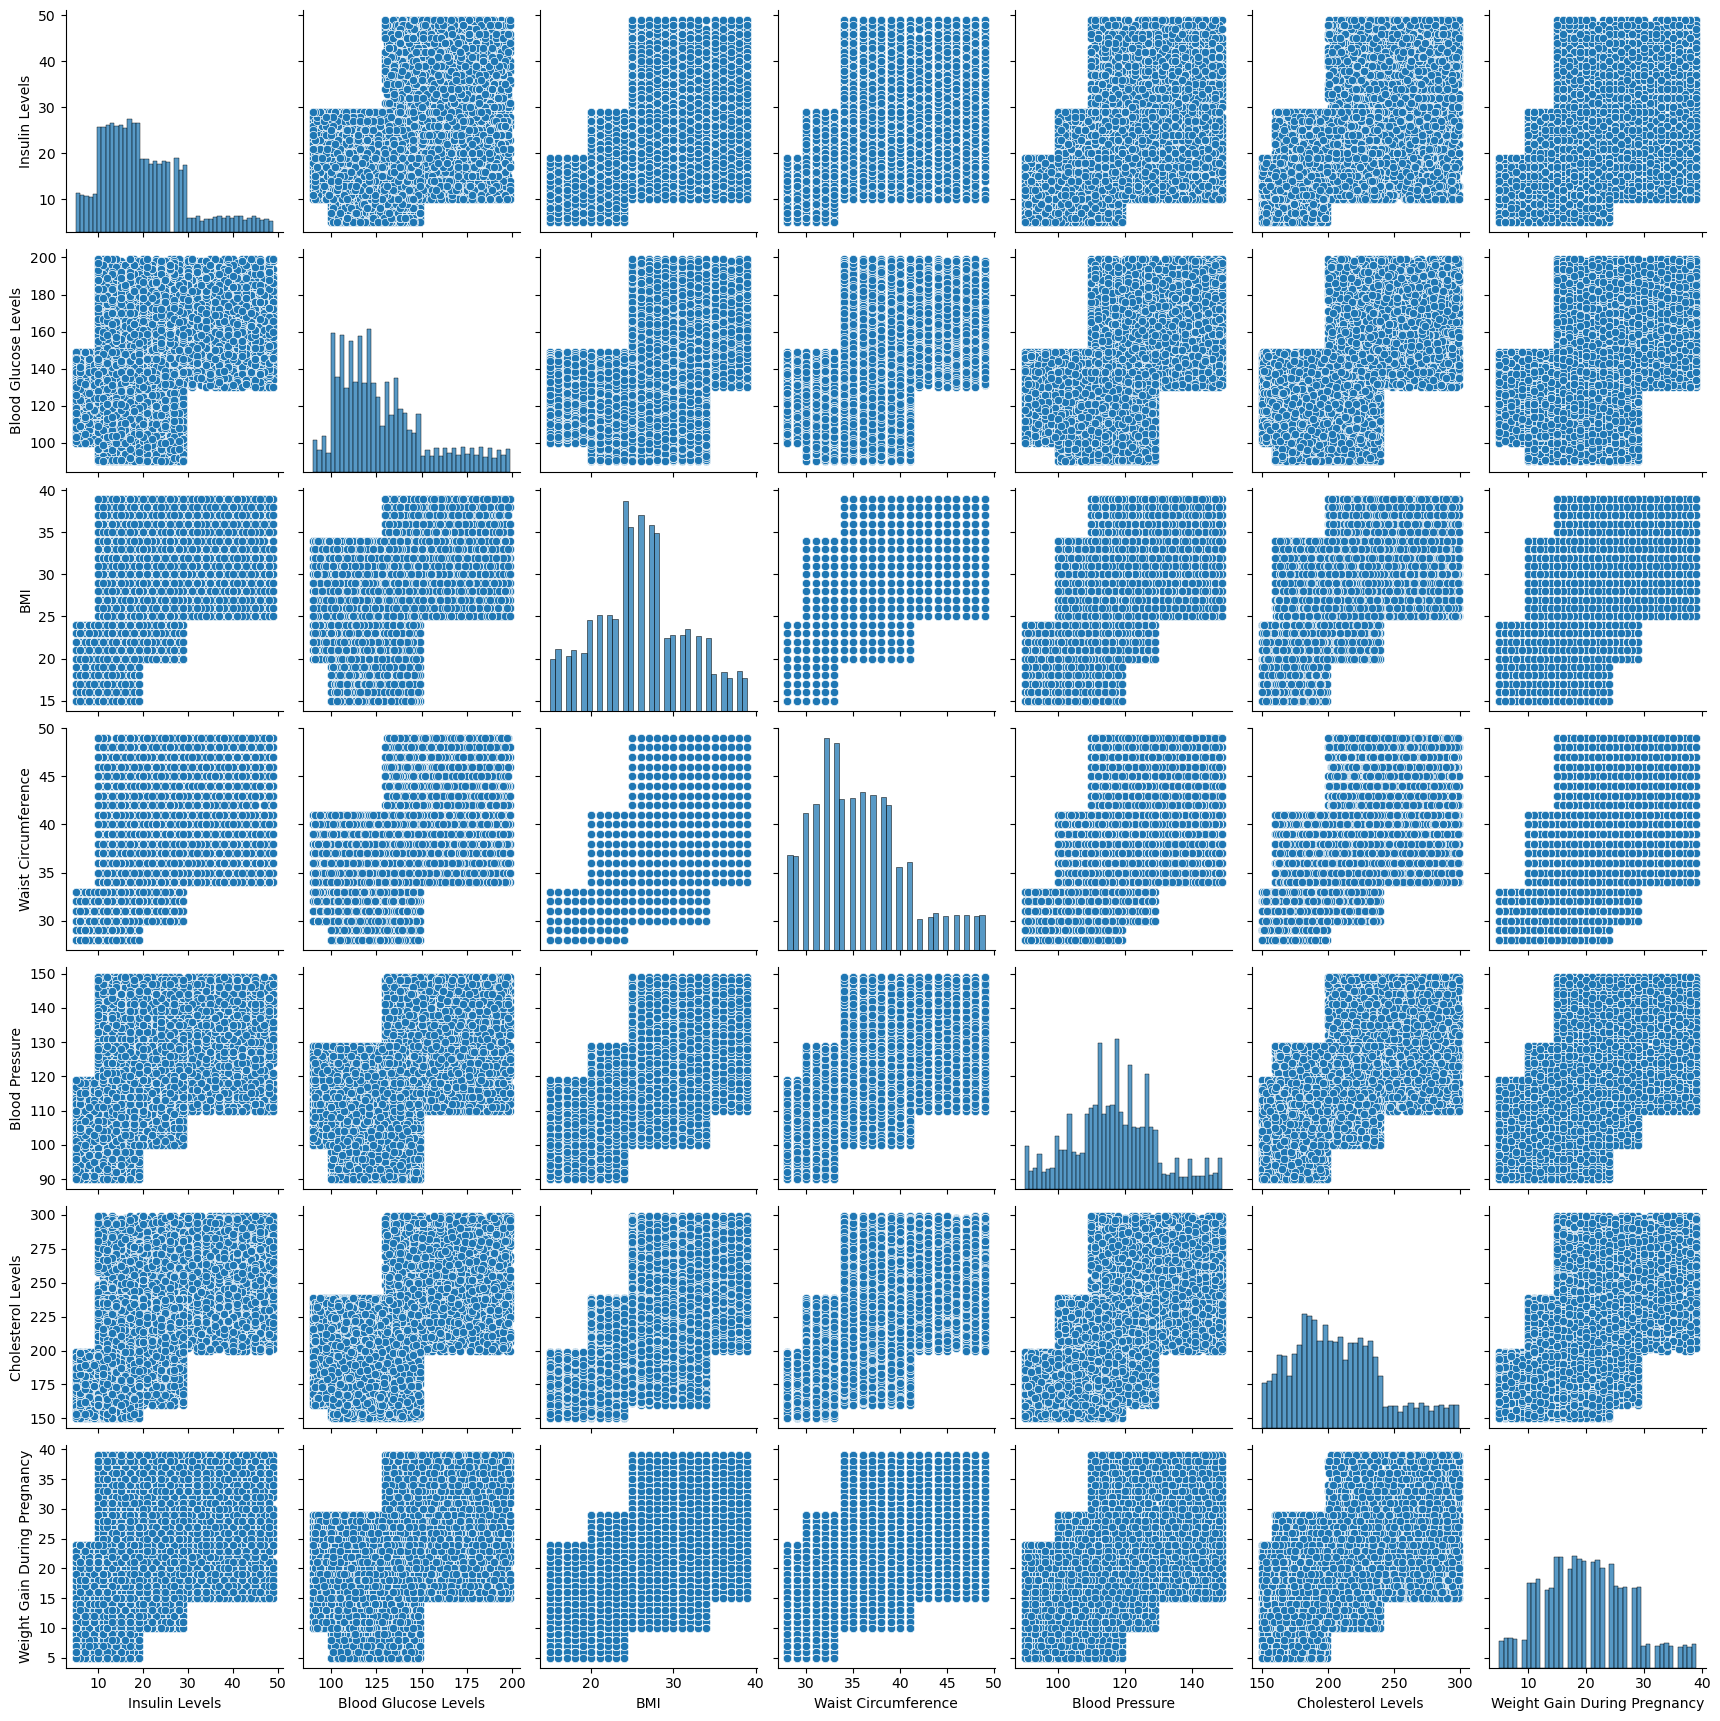

In [51]:
#pairplot of numérical features
sns.pairplot(df)

In [8]:
X = df.drop(["Target", "ID"], axis=1)
Y = df.Target
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['Genetic Markers',
 'Family History',
 'Glucose Tolerance Test',
 'Physical Activity',
 'Dietary Habits',
 'Smoking Status',
 'Alcohol Consumption',
 'Liver Function Tests',
 'Previous Gestational Diabetes',
 'Pregnancy History',
 'Ethnicity',
 'Socioeconomic Factors']

In [9]:
# 🎯 Data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

num_features = numerical_features
cat_features = categorical_features

num_transformer = Pipeline([
    ("imputer", KNNImputer(n_neighbors = 5)),
    ("scaler", MinMaxScaler())
])

# cat_transformer = Pipeline([
#     ("encoder", OneHotEncoder(handle_unknown = "ignore"))
# ])

cat_transformer = Pipeline([
    ("encoder", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [10]:
# Encode categorical variables and split features/target as needed
df_cleaned = preprocessor.fit_transform(X)
new_columns = (
    num_features +
    list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
)

# Convert in Pandas DataFrame
df_cleaned = pd.DataFrame(df_cleaned, columns=new_columns)

X_train,X_test,y_train,y_test = train_test_split(df_cleaned, y, test_size = 0.2, random_state = 42)

In [11]:
# 🤖 Baseline prediction Model
# Modèle SVM
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True)

# Forêt aléatoire
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)

# Régression logistique
reg_model = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="auto")

models =[svm_model, forest_model, tree_model, reg_model]

def train_model(model,xtrain,ytrain,xtest,ytest):
    print("", model)
    model.fit(xtrain,ytrain)

    ypred = model.predict(xtest)
    report = classification_report(ypred, ytest)
    acc = accuracy_score(ypred, ytest)

    return ypred, acc

acc_b = 0
for m in models:
    ypred , acc = train_model(m, X_train, y_train, X_test, y_test)
    print(acc)
    

 SVC(probability=True)
0.8463067240808214
 RandomForestClassifier(random_state=42)
0.9841006955945677
 DecisionTreeClassifier(random_state=42)
0.9566081483935078
 LogisticRegression(max_iter=1000)
0.8343822457767472


In [12]:
#choose the best model
best_model = forest_model
y_pred = best_model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

                      precision    recall  f1-score   support

Gestational Diabetes       0.94      1.00      0.97       724
         Prediabetic       1.00      0.95      0.97       790
     Type 1 Diabetes       1.00      0.99      1.00       784
     Type 2 Diabetes       1.00      1.00      1.00       721

            accuracy                           0.98      3019
           macro avg       0.98      0.98      0.98      3019
        weighted avg       0.98      0.98      0.98      3019



In [13]:
best_model.score(X_test, y_test)

0.9841006955945677

## recherche des meilleurs parametre pour le model

In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10,18,20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)

best_rf = grid_search.best_estimator_

Meilleurs paramètres : {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [14]:
best_model =  RandomForestClassifier(max_depth = 20, min_samples_leaf= 2, min_samples_split= 10,n_estimators= 100, random_state=42)
best_model.fit(X_train, y_train)
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9824430641821946
0.9841006955945677


In [16]:
#choose the best model
best_model = forest_model
y_pred = best_model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

                      precision    recall  f1-score   support

Gestational Diabetes       0.94      1.00      0.97       724
         Prediabetic       1.00      0.95      0.97       790
     Type 1 Diabetes       1.00      0.99      1.00       784
     Type 2 Diabetes       1.00      1.00      1.00       721

            accuracy                           0.98      3019
           macro avg       0.98      0.98      0.98      3019
        weighted avg       0.98      0.98      0.98      3019



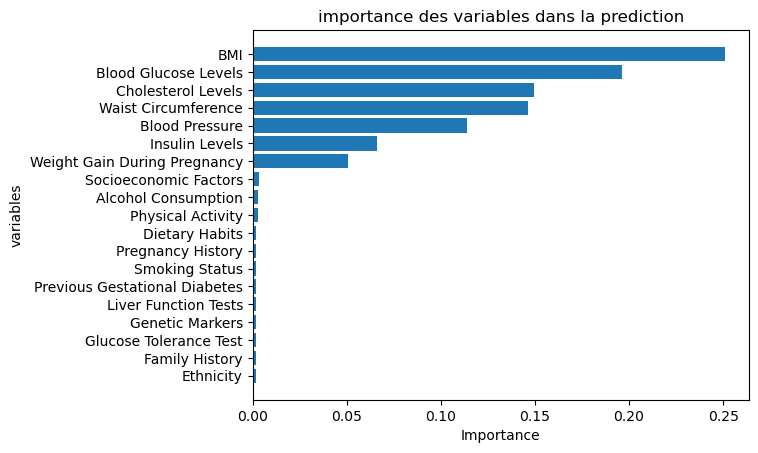

<Figure size 2500x2000 with 0 Axes>

In [17]:
#Affichage de l'importance des variables 
importance = pd.Series(best_model.feature_importances_ ,index=X_train.columns)
importance_sorted = importance.sort_values()
plt.barh(importance_sorted.index, importance_sorted)
plt.title('importance des variables dans la prediction')
plt.xlabel('Importance')
plt.ylabel('variables')
plt.figure(figsize=(25, 20))
plt.show()

In [23]:
## suppression des variables peu importante et entrainement du model avec les variables importantes
X = ['Insulin Levels','Blood Glucose Levels','BMI',
       'Waist Circumference','Physical Activity',
       'Alcohol Consumption', 'Blood Pressure', 'Cholesterol Levels',
       'Weight Gain During Pregnancy', 'Socioeconomic Factors',
       ]
dfx = df_cleaned[X]

#split
xtrain, xtest, ytrain, ytest = train_test_split(dfx, y, test_size=0.2, random_state=42)

#creation model
model_reduit = RandomForestClassifier(max_depth = 20, min_samples_leaf= 2, min_samples_split= 10,n_estimators= 100, random_state=42)

#entrainement
model_reduit.fit(xtrain, ytrain)
#evaluation
print(model_reduit.score(xtrain, ytrain))
print(model_reduit.score(xtest, ytest))

0.9822774327122153
0.9841006955945677


In [25]:
import joblib
joblib.dump(best_model,"Classification_diabete.pkl")
joblib.dump(model_reduit, "classification_diabete_r.pkl")

['classification_diabete_r.pkl']

In [26]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15094 entries, 0 to 15093
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Insulin Levels                15094 non-null  float64
 1   Blood Glucose Levels          15094 non-null  float64
 2   BMI                           15094 non-null  float64
 3   Waist Circumference           15094 non-null  float64
 4   Physical Activity             15094 non-null  float64
 5   Alcohol Consumption           15094 non-null  float64
 6   Blood Pressure                15094 non-null  float64
 7   Cholesterol Levels            15094 non-null  float64
 8   Weight Gain During Pregnancy  15094 non-null  float64
 9   Socioeconomic Factors         15094 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB


In [24]:
# 📤 Generate submission file (update for actual test set)
test_df = pd.read_csv('data/Test.csv')
test_X = test_df.drop(["ID"], axis=1)

df_cleaned = preprocessor.transform(test_X)
new_columns = (
    num_features +
    list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
)
# Convert in Pandas DataFrame
df_cleaned = pd.DataFrame(df_cleaned, columns=new_columns)
df_cleaned

,Insulin Levels,Blood Glucose Levels,BMI,Waist Circumference,Blood Pressure,Cholesterol Levels,Weight Gain During Pregnancy,Genetic Markers,Family History,Glucose Tolerance Test,Physical Activity,Dietary Habits,Smoking Status,Alcohol Consumption,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Ethnicity,Socioeconomic Factors
0,0.318182,0.119266,0.416667,0.190476,0.508475,0.241611,0.294118,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.136364,0.247706,0.708333,0.142857,0.610169,0.442953,0.323529,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,0.113636,0.256881,0.458333,0.523810,0.559322,0.429530,0.382353,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.227273,0.192661,0.416667,0.333333,0.440678,0.469799,0.441176,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
4,0.181818,0.100917,0.500000,0.095238,0.627119,0.167785,0.352941,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6462,0.295455,0.412844,0.666667,0.428571,0.661017,0.422819,0.705882,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0
6463,0.318182,0.183486,0.083333,0.238095,0.406780,0.147651,0.470588,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
6464,0.227273,0.321101,0.666667,0.523810,0.288136,0.510067,0.676471,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,2.0
6465,0.204545,0.256881,0.541667,0.523810,0.491525,0.476510,0.529412,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0


In [25]:

predictions = best_model.predict(df_cleaned)
predictions


array(['Prediabetic', 'Gestational Diabetes', 'Prediabetic', ...,
       'Gestational Diabetes', 'Prediabetic', 'Type 2 Diabetes'],
      dtype=object)

In [238]:
#y_decoded = le.inverse_transform(y_encoded)
# Gestational Diabetes → 0
# Prediabetic → 1
# Type 1 Diabetes → 2
# Type 2 Diabetes → 3
predictions_decoded = pd.Series(predictions).replace({0: "Gestational Diabetes", 1: "Prediabetic", 2: "Type 1 Diabetes", 3: "Type 2 Diabetes"})
predictions_decoded


0                Prediabetic
1       Gestational Diabetes
2                Prediabetic
3                Prediabetic
4       Gestational Diabetes
                ...         
6462    Gestational Diabetes
6463         Type 1 Diabetes
6464    Gestational Diabetes
6465             Prediabetic
6466         Type 2 Diabetes
Length: 6467, dtype: object

In [27]:
submission6 = pd.DataFrame({"id": test_df['ID'], "diabetes_type": predictions})

In [28]:
submission6

,id,diabetes_type
0,ID_001258,Prediabetic
1,ID_002548,Gestational Diabetes
2,ID_002c87,Prediabetic
3,ID_004b83,Prediabetic
4,ID_005d09,Gestational Diabetes
...,...,...
6462,ID_ffac85,Gestational Diabetes
6463,ID_ffb263,Type 1 Diabetes
6464,ID_ffcc7c,Gestational Diabetes
6465,ID_ffe3c6,Prediabetic


In [ ]:
submission6.to_csv('submission/submission6.csv', index=False)

## 🚀 Next Steps
- Try more advanced models (XGBoost, etc.)
- Perform feature engineering and selection
- Consider model interpretability (SHAP, LIME) for healthcare applications

Good luck, and thank you for being part of this impactful challenge! 💙